In [7]:
import numpy as np
from sklearn import datasets
import pandas as pd

#load dataset
iris=datasets.load_iris()

In [3]:
print(iris.feature_names);print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [6]:
print(iris.data[0:5]); print(iris.target[0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


In [8]:
# create dataframe with pandas
df=pd.DataFrame({'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target})

In [11]:
# check the datatypes
df.dtypes

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
species           int32
dtype: object

In [49]:
# import train_test_split function
from sklearn.model_selection import train_test_split

X=df[['sepal length', 'sepal width', 'petal length', 'petal width']];
y=df[['species']]

# splitting it into training and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [50]:
X_train.head()

,sepal length,sepal width,petal length,petal width
81,5.5,2.4,3.7,1.0
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
75,6.6,3.0,4.4,1.4
109,7.2,3.6,6.1,2.5


In [52]:
# importing Random forest classifier
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100);
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
# print(y_pred.shape)
# print(y_test.shape)
#score=y_test[:,1]-y_pred;
from sklearn import metrics

print('accuracy is: ',metrics.accuracy_score(y_test,y_pred))
print('F score is',metrics.confusion_matrix(y_test,y_pred))

accuracy is:  1.0
F score is [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


C:\Python3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [53]:
# checking important parameters with random forest
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal length (cm)    0.481408
petal width (cm)     0.365559
sepal length (cm)    0.099731
sepal width (cm)     0.053302
dtype: float64

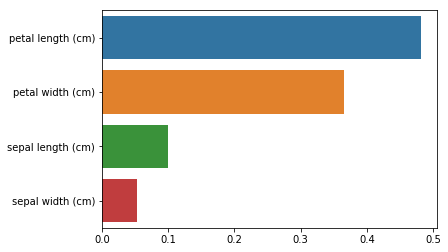

In [55]:
# plotting these features
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.barplot(x=feature_imp, y=feature_imp.index)

In [67]:
!pip3 install pydot

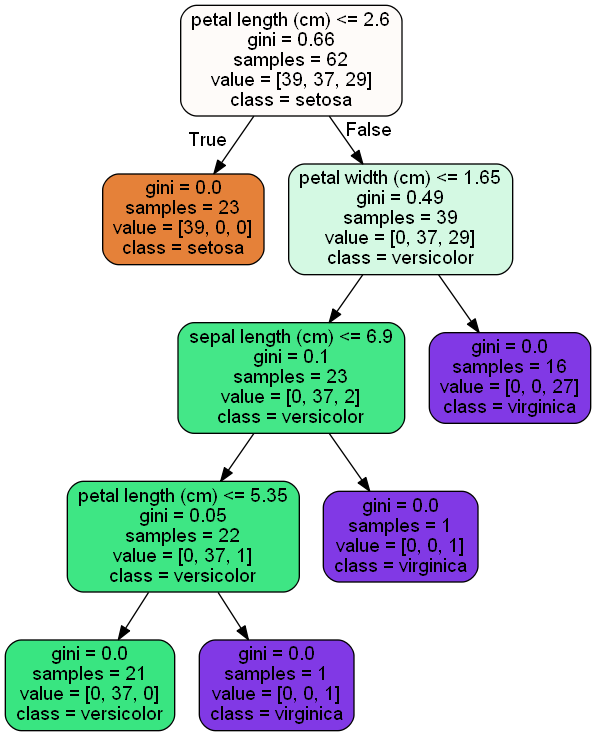

In [78]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [71]:
# extract single tree
estimator=clf.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree1.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)

# use this command in cmd
#"C:\Program Files (x86)\Graphviz2.38\bin\dot.exe" -Tpng -o tree.png

import pydot



#from subprocess import call
#call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree1.png')

FileNotFoundError: [WinError 2] "dot" not found in path.

In [77]:
from subprocess import check_call
check_call(['dot','-Tpng','tree1.dot','-o','OutputFile.png'])

FileNotFoundError: [WinError 2] The system cannot find the file specified

In [74]:
graph.write_png('tree1.png')

FileNotFoundError: [WinError 2] "dot" not found in path.